# Deepxde
Instalação e import da biblioteca Deepxde

In [1]:
!pip install deepxde -q gwpy

# Troca o backend para o pytorch. Caso queira usar o PaddlePaddle, basta trocar pytorch por paddle (depois de instalá-lo).
import os
os.environ['DDE_BACKEND'] = 'pytorch'

import deepxde as dde

# Troca o tipo de ponto flutuante para 64 bit, originalmente é 32 bit (essa alteração é necessária)
dde.config.set_default_float('float64')

import numpy as np

# Caso precise usar alguma função específica do pytorch (não é o caso deste notebook)
import torch
# Exemplo: caso precise usar um seno, deve-se usar: torch.sin(...)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.2/184.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.7 MB/s eta 0:00:00


Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Set the default float type to float64


# Extração dos dados dos arquivos txt


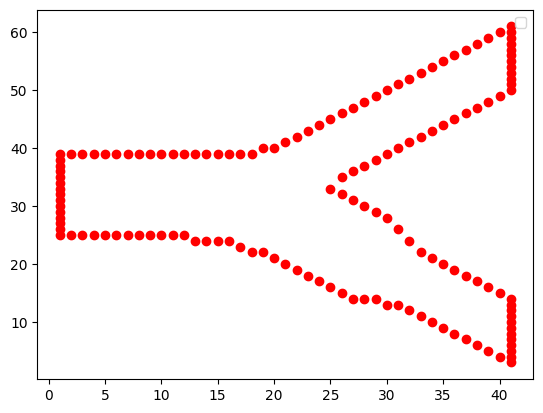

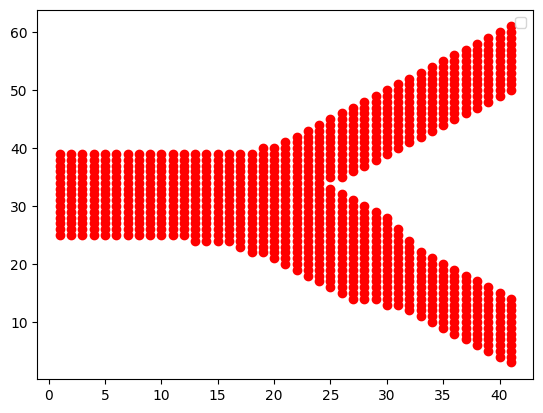

In [18]:
import shapely
from shapely.geometry import MultiPoint
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt
import numpy as np

bcbottom_x = []
bcbottom_y = []

with open('bcbottom_vel.txt', 'r') as file:
    for line in file:
        x, y, y_vel_time_2, y_vel_time_3, y_vel_time_4, y_vel_time_5, x_vel_time_2, x_vel_time_3, x_vel_time_4, x_vel_time_5 = map(float, line.split())
        bcbottom_x.append(x)
        bcbottom_y.append(y)


"""bcbottom_x = [bcbottom_x*0.001 for bcbottom_x in bcbottom_x]
bcbottom_y = [bcbottom_y*0.0005 for bcbottom_y in bcbottom_y]"""

bcinlet_x = []
bcinlet_y = []
bcinlet_x_vel = []
bcinlet_y_vel = []
with open('bcinlet_vel.txt', 'r') as file:
    for line in file:
        x, y, y_vel_time_2, y_vel_time_3, y_vel_time_4, y_vel_time_5, x_vel_time_2, x_vel_time_3, x_vel_time_4, x_vel_time_5 = map(float, line.split())
        bcinlet_x.append(x)
        bcinlet_y.append(y)
        bcinlet_x_vel.append(x_vel_time_4)
        bcinlet_y_vel.append(y_vel_time_4)

"""bcinlet_x = [bcinlet_x*0.001 for bcinlet_x in bcinlet_x]
bcinlet_y = [bcinlet_y*0.0005 for bcinlet_y in bcinlet_y]"""

bcmiddle_x = []
bcmiddle_y = []

with open('bcmiddle_vel.txt', 'r') as file:
    for line in file:
        x, y, y_vel_time_2, y_vel_time_3, y_vel_time_4, y_vel_time_5, x_vel_time_2, x_vel_time_3, x_vel_time_4, x_vel_time_5 = map(float, line.split())
        bcmiddle_x.append(x)
        bcmiddle_y.append(y)



"""bcmiddle_x = [bcmiddle_x*0.001 for bcmiddle_x in bcmiddle_x]
bcmiddle_y = [bcmiddle_y*0.0005 for bcmiddle_y in bcmiddle_y]"""

bcoutletbottom_x = []
bcoutletbottom_y = []
bcout_x_vel_b = []
bcout_y_vel_b = []
with open('bcoutletbottom_vel.txt', 'r') as file:
    for line in file:
        x, y, y_vel_time_2, y_vel_time_3, y_vel_time_4, y_vel_time_5, x_vel_time_2, x_vel_time_3, x_vel_time_4, x_vel_time_5 = map(float, line.split())
        bcoutletbottom_x.append(x)
        bcoutletbottom_y.append(y)
        bcout_x_vel_b.append(x_vel_time_4)
        bcout_y_vel_b.append(y_vel_time_4)



"""bcoutletbottom_x = [bcoutletbottom_x*0.001 for bcoutletbottom_x in bcoutletbottom_x]
bcoutletbottom_y = [bcoutletbottom_y*0.0005 for bcoutletbottom_y in bcoutletbottom_y]"""

bcoutlettop_x = []
bcoutlettop_y = []
bcout_x_vel_t =[]
bcout_y_vel_t=[]
with open('bcoutlettop_vel.txt', 'r') as file:
    for line in file:
        x, y, y_vel_time_2, y_vel_time_3, y_vel_time_4, y_vel_time_5, x_vel_time_2, x_vel_time_3, x_vel_time_4, x_vel_time_5 = map(float, line.split())
        bcoutlettop_x.append(x)
        bcoutlettop_y.append(y)
        bcout_x_vel_t.append(x_vel_time_4)
        bcout_y_vel_t.append(y_vel_time_4)



"""bcoutlettop_x = [bcoutlettop_x*0.001 for bcoutlettop_x in bcoutlettop_x]
bcoutlettop_y = [bcoutlettop_y*0.0005 for bcoutlettop_y in bcoutlettop_y]"""

bctop_x = []
bctop_y = []

with open('bctop_vel.txt', 'r') as file:
    for line in file:
        x, y, y_vel_time_2, y_vel_time_3, y_vel_time_4, y_vel_time_5, x_vel_time_2, x_vel_time_3, x_vel_time_4, x_vel_time_5 = map(float, line.split())
        bctop_x.append(x)
        bctop_y.append(y)


"""bctop_x = [bctop_x*0.001 for bctop_x in bctop_x]
bctop_y = [bctop_y*0.0005 for bctop_y in bctop_y]"""

ip_x = []
ip_y = []
ip_x_vel_time_4 = []
ip_y_vel_time_4 = []
with open('ip_vel.txt', 'r') as file:
    for line in file:
        x, y, y_vel_time_2, y_vel_time_3, y_vel_time_4, y_vel_time_5, x_vel_time_2, x_vel_time_3, x_vel_time_4, x_vel_time_5 = map(float, line.split())
        ip_x.append(x)
        ip_y.append(y)
        ip_y_vel_time_4.append(y_vel_time_4)
        ip_x_vel_time_4.append(x_vel_time_4)


"""ip_x = [ip_x*0.001 for ip_x in ip_x]
ip_y = [ip_y*0.0005 for ip_y in ip_y]"""


# Para seguir a ordem anti horária, como pede o Shapely:
bctop_x = bctop_x[::-1]
bctop_y = bctop_y[::-1]
bcinlet_x = bcinlet_x[::-1]
bcinlet_x = bcinlet_x[::-1]

x = np.concatenate([bcmiddle_x, bcoutlettop_x, bctop_x, bcinlet_x, bcbottom_x, bcoutletbottom_x])
y = np.concatenate([bcmiddle_y, bcoutlettop_y, bctop_y, bcinlet_y, bcbottom_y, bcoutletbottom_y])

points = np.array([x,y]).T
BP =  np.array([x,y]).T
plt.scatter(points[:, 0], points[:, 1], marker='o', color='red')
plt.legend()
plt.show()



x_teste = np.concatenate([bcmiddle_x, bcoutlettop_x, bctop_x, bcinlet_x, bcbottom_x, bcoutletbottom_x, ip_x])
y_teste = np.concatenate([bcmiddle_y, bcoutlettop_y, bctop_y, bcinlet_y, bcbottom_y, bcoutletbottom_y, ip_y])

points = np.array([x_teste,y_teste]).T
plt.scatter(points[:, 0], points[:, 1], marker='o', color='red')
plt.legend()
plt.show()

# Navier-Stokes
Definição da equação de Navier-Stokes estacionária e a continuidade



In [19]:
def pde_re_calculado(x, u):
    # Equações de Navier Stokes para serem minimizadas
    rho = 1100 # kg/m³ -> Densidade do sangue
    mu = 5e-3 # Pa*s -> viscosidade dinâmica do sangue

    u_vel, v_vel, p = u[:, 0:1], u[:, 1:2], u[:, 2:]
    u_vel_x = dde.grad.jacobian(u, x, i=0, j=0)
    u_vel_y = dde.grad.jacobian(u, x, i=0, j=1)

    v_vel_x = dde.grad.jacobian(u, x, i=1, j=0)
    v_vel_y = dde.grad.jacobian(u, x, i=1, j=1)

    u_vel_xx = dde.grad.hessian(u, x, component=0, i=0, j=0)
    u_vel_yy = dde.grad.hessian(u, x, component=0, i=1, j=1)


    v_vel_xx = dde.grad.hessian(u, x, component=1, i=0, j=0)
    v_vel_yy = dde.grad.hessian(u, x, component=1, i=1, j=1)

    p_x = dde.grad.jacobian(u, x, i=2, j=0)
    p_y = dde.grad.jacobian(u, x, i=2, j=1)

    momentum_x = (
       ( u_vel * u_vel_x + v_vel * u_vel_y + (1/rho) * p_x
              - (mu / rho) * (u_vel_xx + u_vel_yy) )
    )
    momentum_y = (
       ( u_vel * v_vel_x + v_vel * v_vel_y + (1/rho) * p_y
              - (mu / rho) * (v_vel_xx + v_vel_yy) )
    )
    continuity = ( u_vel_x + v_vel_y )

    return [momentum_x, momentum_y, continuity]

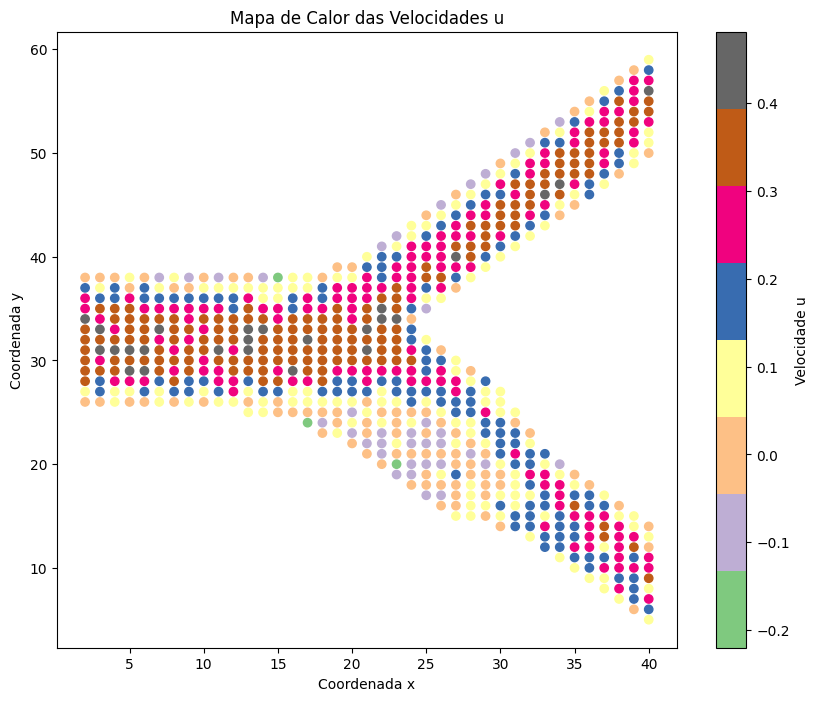

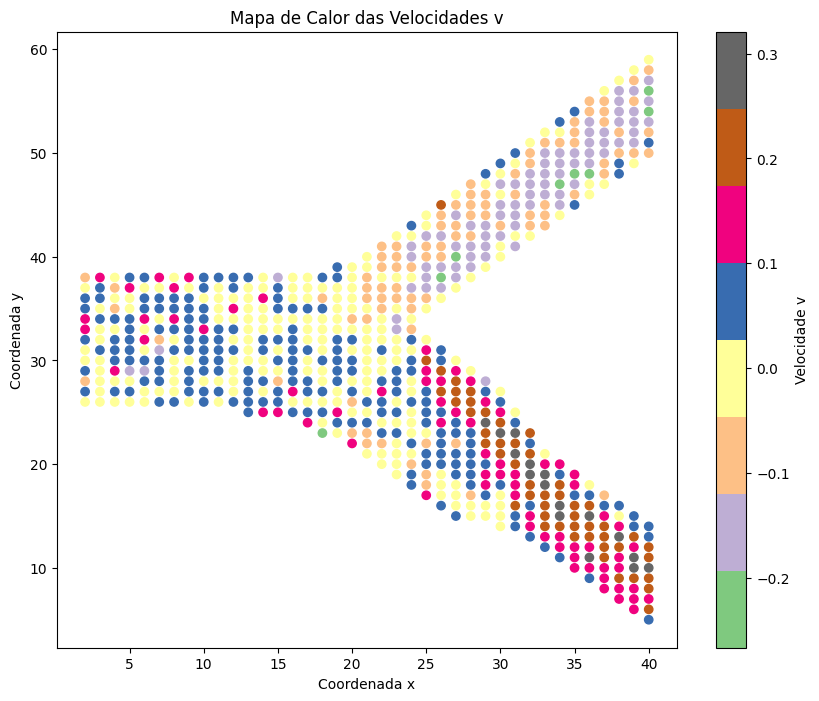

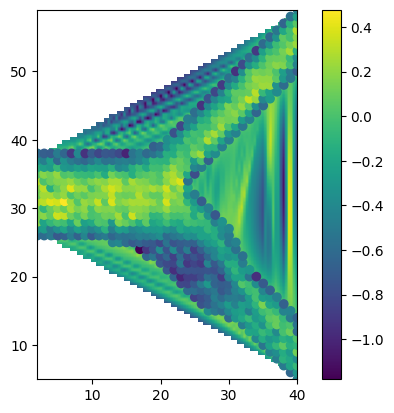

In [20]:
from scipy.interpolate import griddata
vel_u = ip_x_vel_time_4
vel_v = ip_y_vel_time_4

x_p = np.concatenate([ip_x])
y_p = np.concatenate([ip_y])

vel_u = [point*(0.5/np.pi) for point in ip_x_vel_time_4]
vel_v = [point*(0.5/np.pi) for point in ip_y_vel_time_4]

fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(x_p, y_p, c=vel_u, cmap='Accent', marker='o')
plt.colorbar(sc, label='Velocidade u')
plt.title('Mapa de Calor das Velocidades u')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(x_p, y_p, c=vel_v, cmap='Accent', marker='o')
plt.colorbar(sc, label='Velocidade v')
plt.title('Mapa de Calor das Velocidades v')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.show()

points =  np.array([x_p, y_p]).T
xi = np.linspace(min(x_p), max(x_p), 100)
yi = np.linspace(min(y_p), max(y_p), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata(points, vel_u, (xi, yi), method='cubic')

plt.imshow(zi, extent=[min(x_p), max(x_p), min(y_p), max(y_p)], origin='lower', cmap='viridis')
plt.colorbar()
plt.scatter(x_p, y_p, c=vel_u, cmap='viridis')
plt.show()


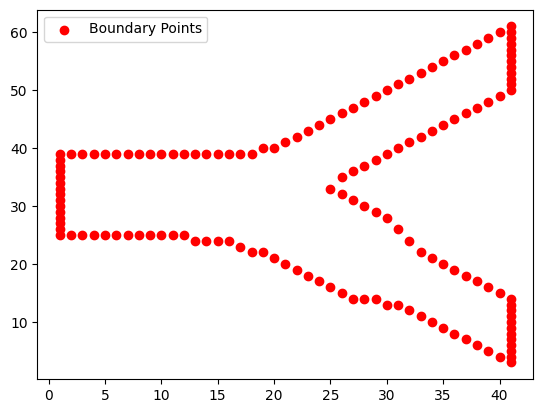

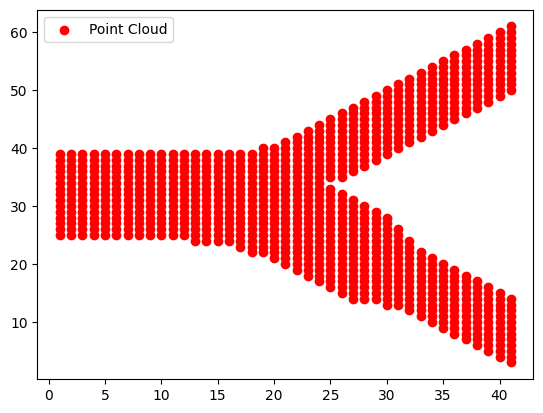

In [21]:
# Para a configuração do PointCloud é necessário ter a nuvem de pontos completa (PointCloud) e especificar o contorno (BondaryPoints)
x = np.concatenate([ip_x, bcmiddle_x, bctop_x, bcbottom_x, bcinlet_x, bcoutletbottom_x, bcoutlettop_x]).T
y = np.concatenate([ip_y, bcmiddle_y, bctop_y, bcbottom_y, bcinlet_y, bcoutletbottom_y, bcoutlettop_y]).T
PC = np.array([x, y]).T

# Boundary não inclui inlet e outlet
contorno_x = np.concatenate([bcmiddle_x, bctop_x, bcbottom_x, bcinlet_x, bcoutlettop_x])
contorno_y = np.concatenate([bcmiddle_y, bctop_y, bcbottom_y, bcinlet_y, bcoutlettop_x])


plt.scatter(BP[:, 0], BP[:, 1], marker='o', color='red', label='Boundary Points')
plt.legend()
plt.show()

plt.scatter(PC[:, 0], PC[:, 1], marker='o', color='red', label='Point Cloud')
plt.legend()
plt.show()

In [ ]:
# Constrói a geometria
geom = dde.geometry.PointCloud(PC,boundary_points=BP)

# Definição das fronteiras
# Para facilitar:
boundarytop = np.array([bctop_x, bctop_y]).T
boundarybottom = np.array([bcbottom_x, bcbottom_y]).T
boundarymiddle = np.array([bcmiddle_x, bcmiddle_y]).T

def boundary_top(x, on_boundary):
  # bctop_x e bctop_y contém as coordenadas de cada ponto de fronteira
  if on_boundary:
     for x_true, y_true in zip(bctop_x, bctop_y):
        if np.isclose(x_true, x[0]) and np.isclose(y_true, x[1]):
            return True
  return False

def boundary_bottom(x, on_boundary):
  # bcbottom_x e bcbottom_y contém as coordenadas de cada ponto de fronteira
  if on_boundary:
    for x_true, y_true in zip(bcbottom_x, bcbottom_y):
      if np.isclose(x_true, x[0]) and np.isclose(y_true, x[1]):
          return True
  return False


def boundary_middle(x, on_boundary):
  # bcmiddle_x e bcmiddle_y contém as coordenadas de cada ponto de fronteira
  if on_boundary:
    for x_true, y_true in zip(bcmiddle_x, bcmiddle_y):
      if np.isclose(x_true, x[0]) and np.isclose(y_true, x[1]):
          return True
  return False

def ip(x, on_boundary):
    for x_true, y_true in zip(ip_x, ip_y):
      if np.logical_and(np.isclose(x_true, x[0]), np.isclose(y_true, x[1])):
          return True
    return False

def boundary_inlet(x, on_boundary):
  return on_boundary and dde.utils.isclose(x[0], 1)

def boundary_outlet_b(x, on_boundary):
  return on_boundary and dde.utils.isclose(x[0], 41) and x[1]>=4 and x[1]<=13
def boundary_outlet_t(x, on_boundary):
  return on_boundary and dde.utils.isclose(x[0], 41) and x[1]>=51 and x[1]<=60

def parabolic_inlet(x):
  return (((-x[:, 1] ** (2)) + (64 * x[:, 1])- (988))/36).reshape(-1, 1)
def parabolic_outlet_b(x):
  return ((-1)*((x[:, 1]-4) + (x[:, 1]-13))/20.25).reshape(-1, 1)
def parabolic_outlet_t(x):
  return ((-1)*((x[:, 1]-51) + (x[:, 1]-60))/20.25).reshape(-1, 1)

In [24]:
# Condições de DirichLet nas velocidades
u_t_bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary_top, component=0)
u_m_bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary_middle, component=0)
u_b_bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary_bottom, component=0)

v_t_bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary_top, component=1)
v_m_bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary_middle, component=1)
v_b_bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary_bottom, component=1)

inlet_u = dde.icbc.DirichletBC(geom, parabolic_inlet, boundary_inlet, component=0)
outlet_u_b = dde.icbc.DirichletBC(geom, parabolic_outlet_b, boundary_outlet_b, component=0)
outlet_u_t = dde.icbc.DirichletBC(geom, parabolic_outlet_t, boundary_outlet_t, component=0)

In [ ]:
# Adicionar essas condições à lista de boundary conditions (BCs)
bc = [u_t_bc, u_m_bc, u_b_bc, v_t_bc, v_m_bc, v_b_bc, inlet_u, outlet_u_b, outlet_u_t]

In [ ]:
data = dde.data.PDE(
    geom,
    pde_re_calculado,
    bc,
    num_domain=2500,
    num_boundary=1800,
    num_test=2500
)

net = dde.nn.FNN([2] + 4 * [100] + [3], "tanh", "Glorot normal")

model = dde.Model(data, net)

# compila o modelo. primeiro adam e depois l-bfgs para melhorar a precisão
model.compile(optimizer = 'adam', lr = 1e-3)
losshistory, train_state = model.train(epochs = 5000, display_every = 1000, model_save_path = './')
dde.saveplot(losshistory, train_state, issave = True, isplot = True)

model.compile(optimizer = 'adam', lr = 1e-5)
losshistory, train_state = model.train(epochs = 10000, display_every = 1000, model_save_path = './')
dde.saveplot(losshistory, train_state, issave = True, isplot = True)

model.compile(optimizer = 'adam', lr = 1e-7)
losshistory, train_state = model.train(epochs = 15000, display_every = 1000, model_save_path = './')
dde.saveplot(losshistory, train_state, issave = True, isplot = True)

model.compile(optimizer = 'L-BFGS-B')
losshistory, train_state = model.train(display_every = 100, model_save_path = './')
dde.saveplot(losshistory, train_state, issave = True, isplot = True)

In [ ]:
X_test = geom.random_points(30000)  
u_pred = model.predict(X_test)

u_pred = u_pred[:, 0] 
min_val, max_val = -np.pi, np.pi
u_pred_clipped = np.clip(u_pred, min_val, max_val)
u_pred_normalized = (u_pred_clipped - min_val) / (max_val - min_val)

plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=u_pred_normalized, cmap="Accent", s=40)  
plt.colorbar(label="Solução predita")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Resolução do problema")
plt.grid(True)
plt.show()